#### Gather

In [188]:
import pandas as pd
import re

In [189]:
df_animals = pd.read_csv('../data/animals.csv')
df_copy = df_animals.copy()
df_copy.head()

,Animal,Body weight (kg),Brain weight (g)
0,bbMountain beaver,1!35,8!1
1,bbCow,465,423
2,bbGrey wolf,36!33,119!5
3,bbGoat,27!66,115
4,bbGuinea pig,1!04,5!5


#### Assess

- Quality
    - bb before animal name
    - exclamation in Body weight
    - Brain weight exclamation

#### Clean

 - remove bb from col Animals
 - remove ! from body weight and brain weight

In [190]:
df_copy['Animal'] = df_copy['Animal'].str.replace('bb','')
# or
# df_copy['Animal'] = df_copy['Animal'].str[2:]
df_copy['Body weight (kg)'] = df_copy['Body weight (kg)'].str.replace('!','.')
df_copy['Brain weight (g)'] = df_copy['Brain weight (g)'].str.replace('!','.')

#### Test

In [51]:
df_copy.head()

,Animal,Body weight (kg),Brain weight (g)
0,Mountain beaver,1.35,8.1
1,Cow,465,423
2,Grey wolf,36.33,119.5
3,Goat,27.66,115
4,Guinea pig,1.04,5.5


#### Gathering

In [247]:
df_patients = pd.read_csv('../data/patients.csv')
df_treatments = pd.read_csv('../data/treatments.csv')
df_reactions = pd.read_csv('../data/adverse_reactions.csv')

In [248]:
# Copying before assessment
copy_patients = df_patients.copy()
copy_treatments = df_treatments.copy()
copy_reactions = df_reactions.copy()

In [222]:
#copy_patients.head()
#print(copy_patients.info())
len(copy_patients[copy_patients['address'].duplicated()])

19

In [223]:
#copy_treatments.head()
print(copy_treatments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
given_name      280 non-null object
surname         280 non-null object
auralin         280 non-null object
novodra         280 non-null object
hba1c_start     280 non-null float64
hba1c_end       280 non-null float64
hba1c_change    171 non-null float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB
None


In [86]:
copy_reactions.head()
#print(copy_reactions.info())

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


In [73]:
all_columns = pd.Series(list(copy_patients)+list(copy_reactions)+list(copy_treatments))
all_columns[all_columns.duplicated()==True]

14    given_name
15       surname
17    given_name
18       surname
dtype: object

#### Assess Quality
- Patients
    - duplicated columns given_name, surname
    - patient: patient_address null rows
    - patient: zipcode is float and has 4 digits
    - patient: state is full name or abbreviations sometimes
    - patient: phone number format
- Treatments
    - hba1c_change null values
    - lower case given name and surnames
    - u in auralin and novodra
    - null has been represented by - in auralin and novodra
    - wrong hba1c change calculations
- Adverse_Reactions
    - lower case given name and surnames

#### Tidiness
- Contact column in `patients` table should be split into phone number and email
- Three variables in two columns in `treatments` table (treatment, start dose and end dose)
- Adverse reaction should be part of the `treatments` table
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables

#### Clean
 - Treatments : Recalculate hba1c_change 

In [249]:
copy_treatments.head()
copy_treatments['hba1c_change'] = copy_treatments['hba1c_start']-copy_treatments['hba1c_end']

In [199]:
#copy_patients.head()

In [200]:
#copy_patients['contact'].str.extract('(\d*)-(\d*)-')

In [250]:
#copy_patients['contact'].str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])')
copy_patients['email'] = copy_patients['contact'].str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+\@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])',expand=True)

In [251]:
copy_patients['phone number'] = copy_patients['contact'].str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})',expand=True)

In [202]:
#copy_patients.head()

In [252]:
copy_patients.drop('contact',axis=1,inplace=True)

In [280]:
copy_treatments.head()

,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15


In [254]:
copy_treatments = pd.melt(copy_treatments,id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
        var_name='treatment', value_name='dose')

In [255]:
copy_treatments = copy_treatments[copy_treatments['dose']!='-'] #remove rows with '-'

In [265]:
copy_treatments['dose_start'], copy_treatments['dose_end'] = copy_treatments['dose'].str.split('-',1).str

In [268]:
copy_treatments.drop('dose',axis=1,inplace=True)

In [272]:
copy_treatments = pd.merge(copy_treatments, copy_reactions,
                            on=['given_name', 'surname'], how='left')

In [274]:
copy_treatments.sample(50)

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
168,hanka,gegič,7.67,7.29,0.38,novodra,19u,27u,NaN
185,melisa,mata,8.56,8.27,0.29,novodra,57u,57u,NaN
10,tekla,walczak,7.61,7.29,0.32,auralin,29u,39u,NaN
163,jackson,addison,7.99,7.51,0.48,novodra,42u,42u,NaN
180,else,andersen,7.98,7.60,0.38,novodra,36u,38u,NaN
204,jowita,wiśniewska,7.50,7.08,0.42,novodra,22u,23u,NaN
254,eemil,laine,7.89,7.53,0.36,novodra,30u,29u,NaN
73,yunadi,barsukov,9.47,9.05,0.42,auralin,48u,58u,NaN
149,benoît,bonami,9.82,9.40,0.42,novodra,44u,43u,NaN
114,hawra',tuma,7.93,7.56,0.37,auralin,26u,35u,NaN


In [279]:
id_names = copy_patients[['patient_id', 'given_name', 'surname']]
id_names['given_name'] = id_names['given_name'].str.lower()
id_names['surname'] = id_names['surname'].str.lower()
copy_treatments = pd.merge(copy_treatments,id_names,on=['given_name','surname'])
copy_treatments = copy_treatments.drop(['given_name', 'surname'], axis=1)

/Applications/Utilities/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/Utilities/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [289]:
copy_treatments.groupby(['treatment','adverse_reaction']).count()['patient_id']

treatment  adverse_reaction         
auralin    headache                     1
           hypoglycemia                 9
           nausea                       1
           throat irritation            2
novodra    cough                        1
           headache                     2
           hypoglycemia                 9
           injection site discomfort    2
Name: patient_id, dtype: int64

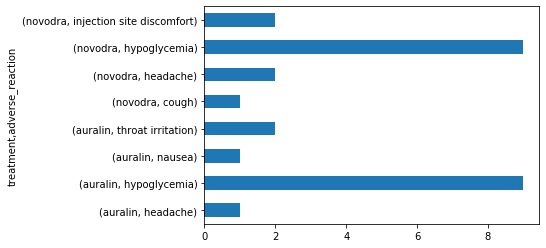

In [295]:
copy_treatments.groupby(['treatment','adverse_reaction']).count()['patient_id'].plot(kind='barh')